This is a code to implement custom GridSearchCV for KNN without using Sklearn from python with scratch.

Full Explanation of Code: https://noor12401.medium.com/hyper-parameter-tuning-with-custom-gridsearchcv-d5212f218cc0
<br>Explained and Implemented by: Nooruddin Shaikh

In [65]:
#Importing Important Libraries
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline

## Implementing Custom GridSearchCV for KNN

In [97]:
knn = KNeighborsClassifier()
parameter = {'n_neighbors': [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29]}
cv_folds = 4

In [98]:
#This function will return 60% of the data from the given data randomly without creating duplicates.
#Here we are creating 60% of out x_train data i.e 60% of 7500 datapoints
def select_data_without_duplicates(x_train):
    return random.sample(range(0, len(x_train)), int(0.6*len(x_train)))

In [99]:
def GridSearchCV(x_train, y_train, classifier, parameter, folds):
    trainscores = []
    testscores = []
    for k in tqdm(parameter['n_neighbors']):
        training_fold_scores = []
        cv_fold_scores = []
        for j in range(0, cv_folds):
            #Spliting Data into train and test
            training_data = select_data_without_duplicates(x_train) #60% of the x_train data
            cv_data = list(set(list(range(1, len(x_train)))) - set(training_data)) #Remaining data: 100% - 60%
            #Evaluating X_train, Y_train, X_test, Y_test data from new split
            X_train = x_train[training_data]
            X_cv = x_train[cv_data]
            Y_train = y_train[training_data]
            Y_cv = y_train[cv_data]
            #Applying KNN Algorithm and fitting model
            classifier.n_neighbors = k
            classifier.fit(X_train, Y_train)
            #Predicting accuracy for X_test data and appending value to testing_fold_scores
            Y_cv_predict = classifier.predict(X_cv)
            cv_fold_scores.append(accuracy_score(Y_cv, Y_cv_predict))
            #Predicting accuracy for X_test data and appending value to training_fold_scores
            Y_train_predict = classifier.predict(X_train)
            training_fold_scores.append(accuracy_score(Y_train, Y_train_predict))
            
        #For each fold i.e folds=0,1,2 we have predicted accuracy for x_train and x_test. Since we have three values,
        #We will take means of three accuracies and appending them to trainscores and testscores.
        trainscores.append(np.mean(np.array(training_fold_scores)))
        testscores.append(np.mean(np.array(cv_fold_scores)))
    return trainscores,testscores

In [100]:
#Creating a datasets with 10k data points where there will be 2 informative features and 0 redundant features.
#Refer https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html
x, y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=53)

#Spliting data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=32)

In [101]:
print(len(X_train))
print(len(X_test))

7500
2500


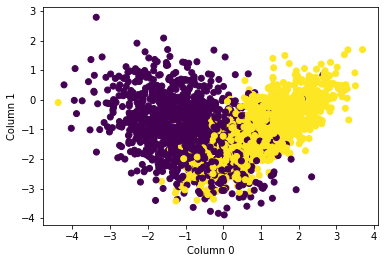

In [102]:
# Visualizing our datasets

#plotiing Column 0 vs Column 1 of Training Dataset using scatter plot
plt.scatter(X_test[:,0], X_test[:, 1], c=y_test)
plt.xlabel('Column 0')
plt.ylabel('Column 1')
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:11<00:00,  1.33it/s]


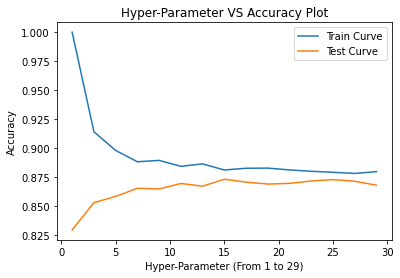

In [105]:
trainscores, testscores = GridSearchCV(X_train, y_train, knn, parameter, cv_folds)

plt.plot(parameter['n_neighbors'], trainscores, label='Train Curve')
plt.plot(parameter['n_neighbors'], testscores, label='Test Curve')
plt.title('Hyper-Parameter VS Accuracy Plot')
plt.xlabel('Hyper-Parameter (From 1 to 29)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Here we can clearly see, the optimal value of K is 15 with the highest accuracy of 87.5%